In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df=pd.read_csv('/content/Tesla.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Basic statistical details
statistics = df.describe()
missing_values, statistics

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Volume       0
 Adj Close    0
 dtype: int64,
               Open         High          Low        Close        Volume  \
 count  1692.000000  1692.000000  1692.000000  1692.000000  1.692000e+03   
 mean    132.441572   134.769698   129.996223   132.428658  4.270741e+06   
 std      94.309923    95.694914    92.855227    94.313187  4.295971e+06   
 min      16.139999    16.629999    14.980000    15.800000  1.185000e+05   
 25%      30.000000    30.650000    29.215000    29.884999  1.194350e+06   
 50%     156.334999   162.370002   153.150002   158.160004  3.180700e+06   
 75%     220.557495   224.099999   217.119999   220.022503  5.662100e+06   
 max     287.670013   291.420013   280.399994   286.040009  3.716390e+07   
 
          Adj Close  
 count  1692.000000  
 mean    132.428658  
 std      94.313187  
 min      15.800000  
 25%      29.884999  
 50%     158.160004  
 75%     220.022503  
 max     28

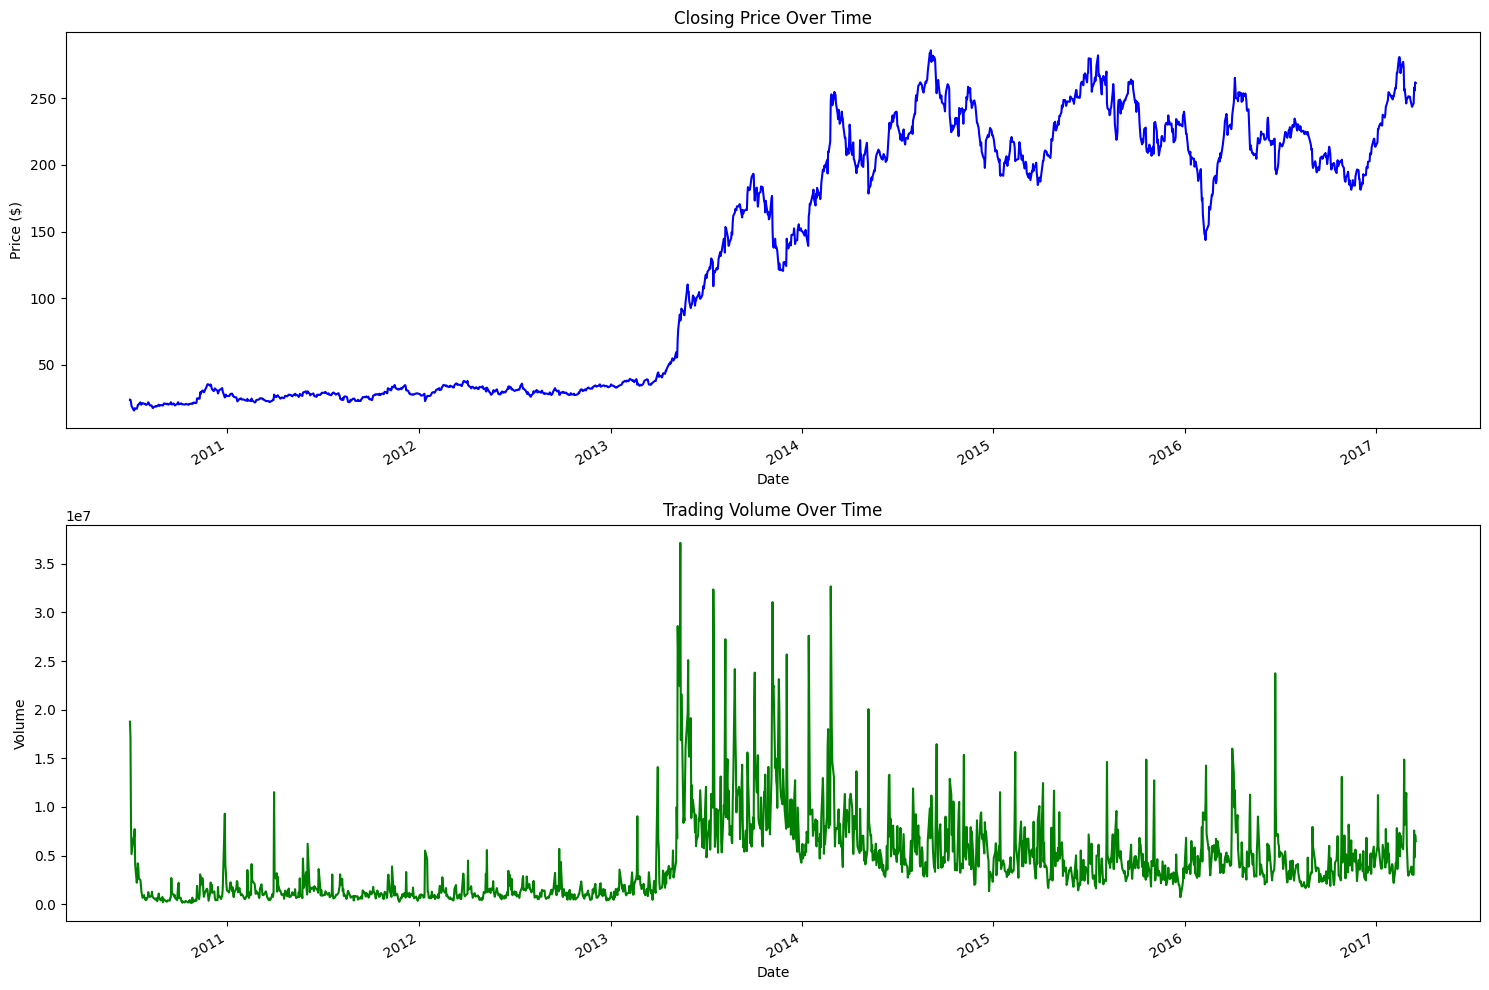

In [6]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date as the index of the dataframe for plotting
df.set_index('Date', inplace=True)

# Create a figure and a set of subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot the closing price over time
df['Close'].plot(ax=ax[0], color='blue')
ax[0].set_title('Closing Price Over Time')
ax[0].set_ylabel('Price ($)')

# Plot the trading volume over time
df['Volume'].plot(ax=ax[1], color='green')
ax[1].set_title('Trading Volume Over Time')
ax[1].set_ylabel('Volume')

# Improve layout
plt.tight_layout()
plt.show()


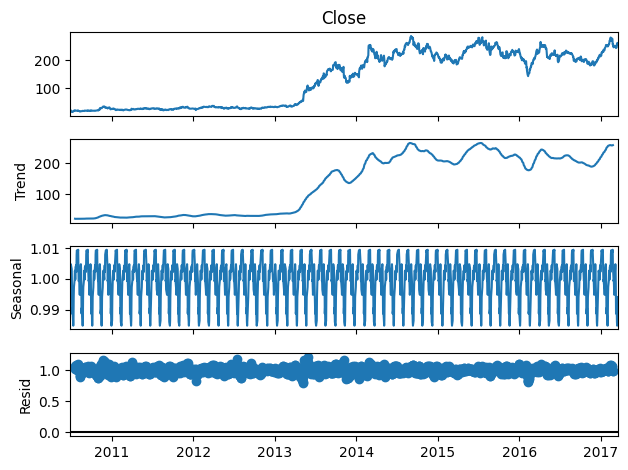

In [7]:
# Seasonality Analysis
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)
fig = decomposition.plot()
plt.show()

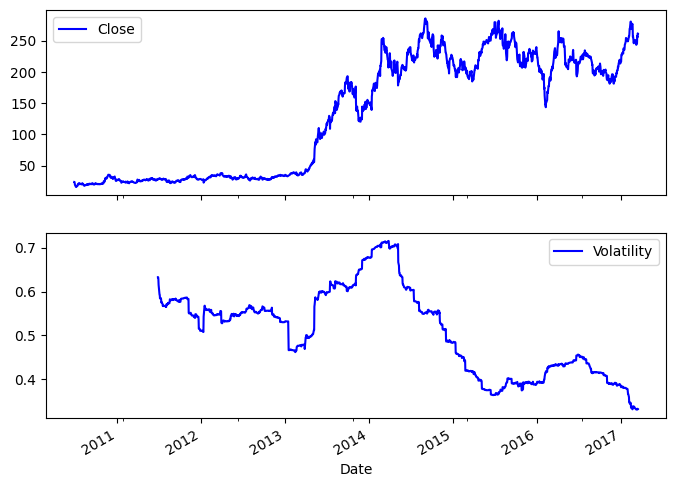

In [8]:
# Volatility Analysis
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=252).std() * np.sqrt(252)
df[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8, 6))
plt.show()

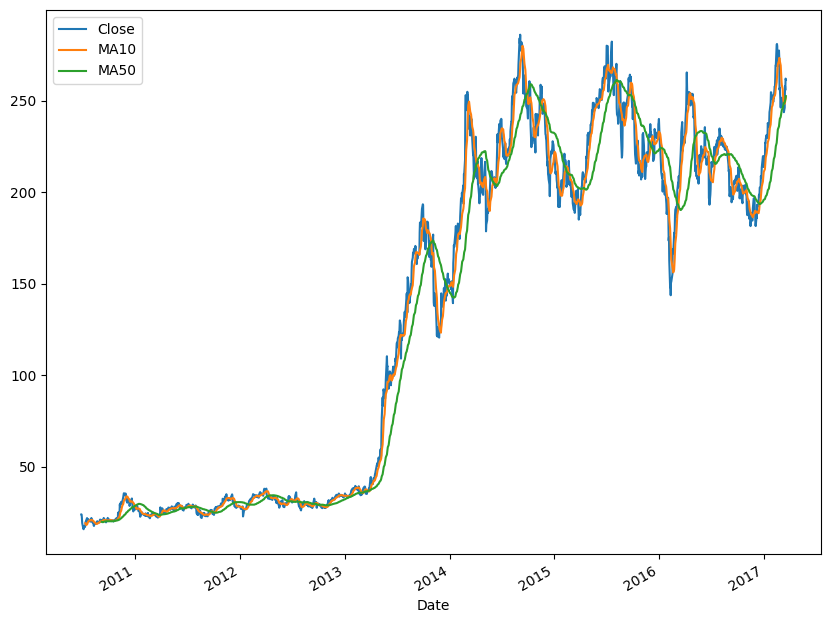

In [9]:
# Moving Average Analysis
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df[['Close','MA10','MA50']].plot(label='Tesla', figsize=(10,8))
plt.show()

#The moving average analysis yields the following insights:

Closing Prices: As previously observed, the closing prices of Tesla's stock have a general upward trend over time, with some periods of decline.

10-Day Moving Average (MA10): The 10-day moving average shows the short-term trend of Tesla's stock price. When the closing price is above the 10-day moving average, it may indicate an upward trend in the short term, and vice versa.

50-Day Moving Average (MA50): The 50-day moving average shows the longer-term trend of Tesla's stock price. When the closing price is above the 50-day moving average, it may indicate an upward trend in the long term, and vice versa.

One common strategy used by some traders is to look for crossings of different moving averages as a signal for potential buying or selling opportunities. For example, when the MA10 crosses above the MA50 (a "bullish crossover"), it could be seen as a buy signal, as it indicates that the short-term trend is moving upwards faster than the long-term trend. Conversely, when the MA10 crosses below the MA50 (a "bearish crossover"), it could be seen as a sell signal.

Next, let's analyze the returns of the stock. This will give us an idea of how much the stock price changes from day to day. A positive return means the stock price increased, while a negative return means it decreased.

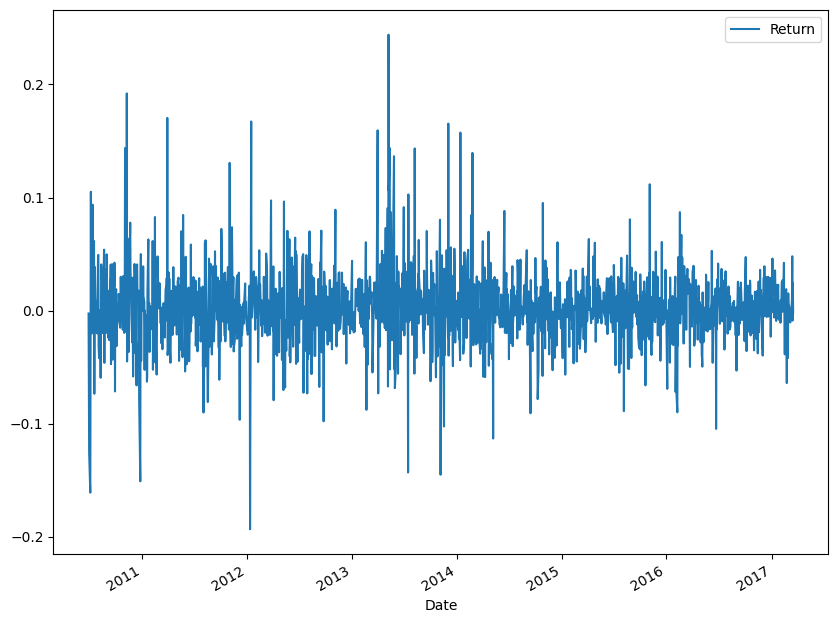

In [10]:
# Return Analysis
df['Return'] = df['Close'].pct_change()
df[['Return']].plot(label='Return', figsize=(10,8))
plt.show()

The return analysis chart illustrates the daily percentage change in Tesla's stock price. Here are some observations:

Return: The daily return fluctuates around 0, with a mix of positive and negative returns. This indicates that the stock price has days of both gains and losses.

The magnitude of these daily returns provides some indication of the stock's volatility. Larger swings (both up and down) indicate more volatility. As seen in the chart, there are periods with higher volatility (larger fluctuations in returns) and periods with lower volatility (smaller fluctuations in returns).

Some extreme spikes represent days with particularly significant price changes. These might be related to specific events, such as earnings announcements, changes in the broader market, or other news related to the company or its industry.

Remember, a positive return means the stock price increased from the previous day, while a negative return means it decreased.

In [11]:
# Prepare the data for Prophet
prophet_df = df.reset_index()[['Date', 'Close']]
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

prophet_df.head()


,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [16]:
model = Prophet(daily_seasonality=True)

In [17]:
# Fit the model to the data
model.fit(prophet_df)

# Specify the number of days for predictions
future = model.make_future_dataframe(periods=365)

# Use the model to make predictions
forecast = model.predict(future)


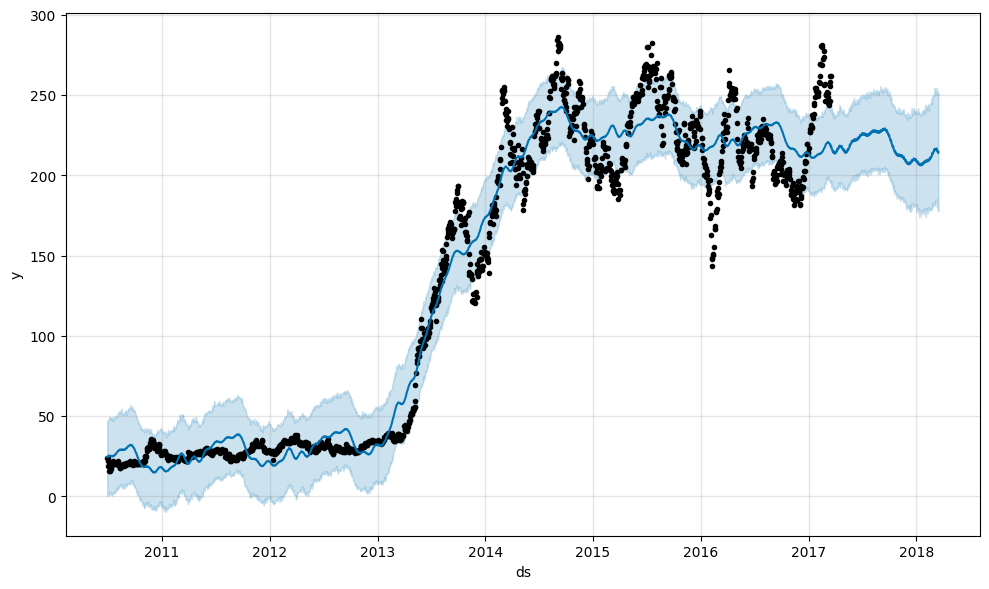

In [18]:
model.plot(forecast)
plt.show()

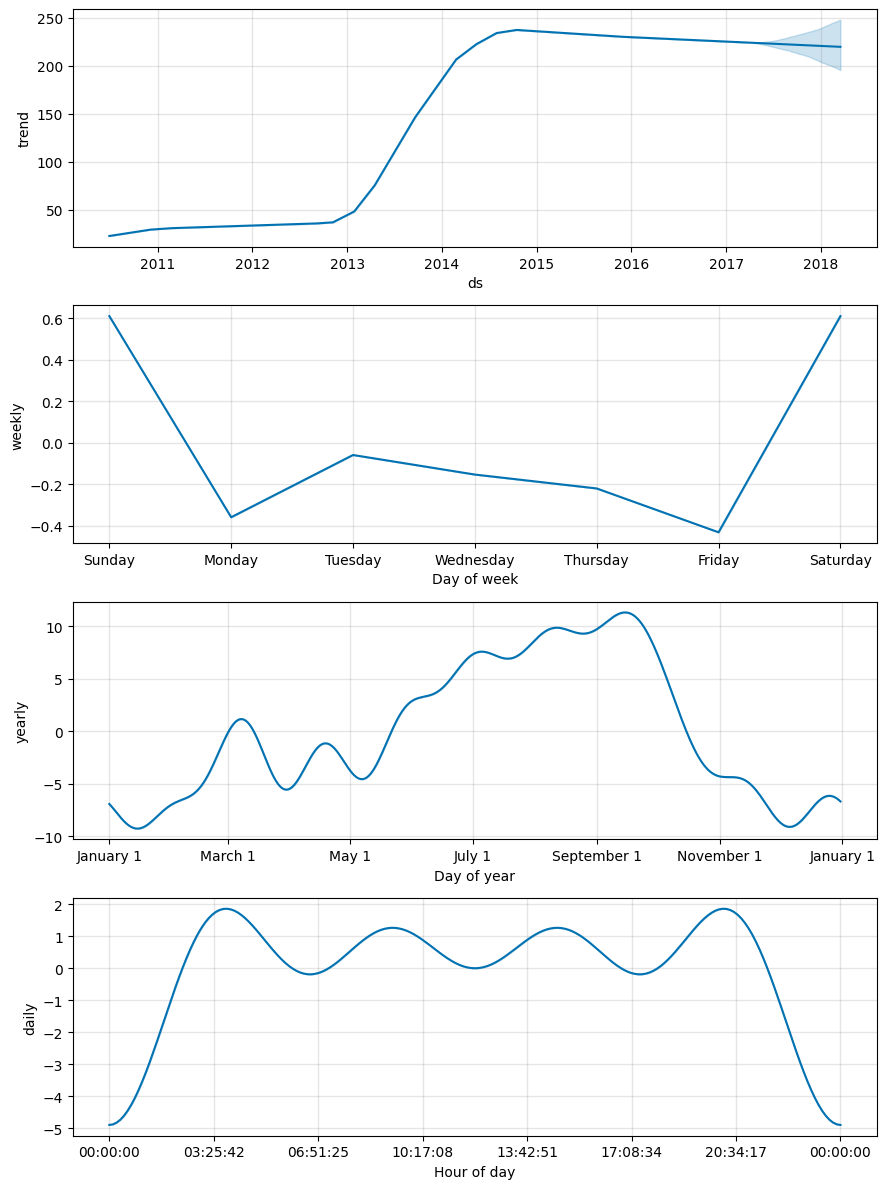

In [19]:
model.plot_components(forecast)
plt.show()